# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type


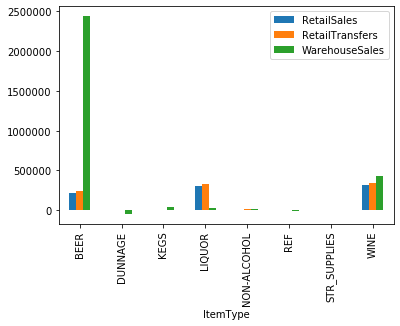

In [37]:
chart=data.groupby("ItemType").agg({'RetailSales':'sum','RetailTransfers':'sum','WarehouseSales':'sum'})

chart.plot.bar()

plt.show()


## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

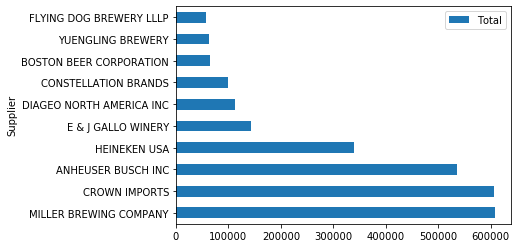

In [38]:
data["Total"]=data["RetailSales"]+data["WarehouseSales"]
#I add a new column with the sum of Sales(I am not taking into account transfers as in the previous excercise)

df2=data.groupby("Supplier").agg({"Total":"sum"})

chart2=df2.sort_values(by=['Total'], ascending=False)

chart2.head(10).plot.barh()

plt.show()

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

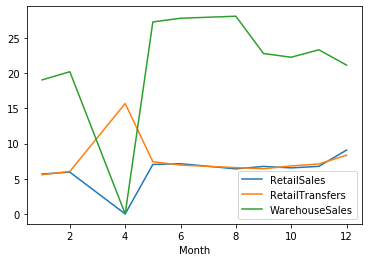

In [39]:
chart3=data.groupby("Month").agg({'RetailSales':'mean','RetailTransfers':'mean','WarehouseSales':'mean'})

chart3.plot.line()

plt.show()

## 4. Plot the same information as above but as a bar chart.

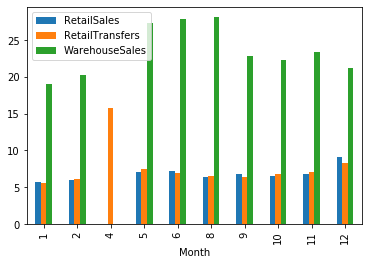

In [40]:
chart3.plot.bar()

plt.show()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

,RetailSales,Month,Year
ItemType,,,
BEER,209763.11,115830,33132676
DUNNAGE,0.00,236,64552
KEGS,0.00,27033,7338694
LIQUOR,309847.85,197353,57282701
NON-ALCOHOL,8109.97,4426,1266826
REF,281.34,385,102879
STR_SUPPLIES,995.98,774,213823
WINE,313400.42,562617,159514312


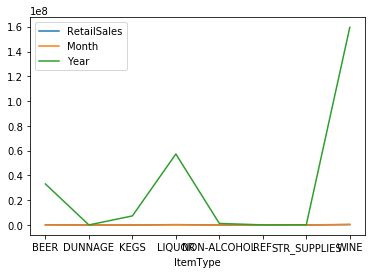

In [49]:
df5 = data[["ItemType","RetailSales","Month","Year"]].groupby(["ItemType"]).sum()

display(df5)

df5.plot.line()
#I am not being able to show it in here as I visualize how the grafic should be. Anyway wouldn't another kind of
#graphic be better for comparing this kind of info between different months and years, such as a barchart that shows
#the total amount for each year in each of the months...
plt.show()

## 6. Plot the same information as above but as a bar chart.

<function matplotlib.pyplot.show(*args, **kw)>

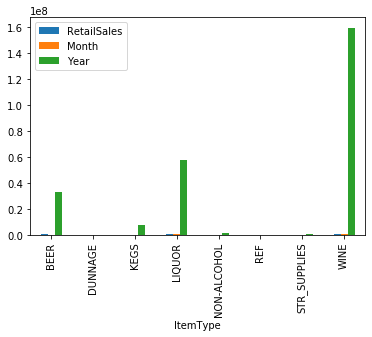

In [50]:
df5.plot.bar()

plt.show

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

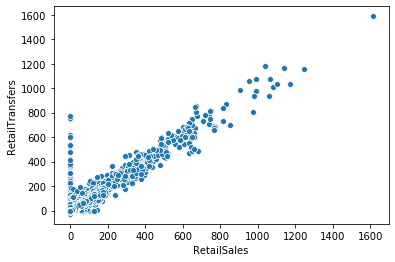

In [52]:
sns.scatterplot("RetailSales","RetailTransfers",data=data)

plt.show()

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

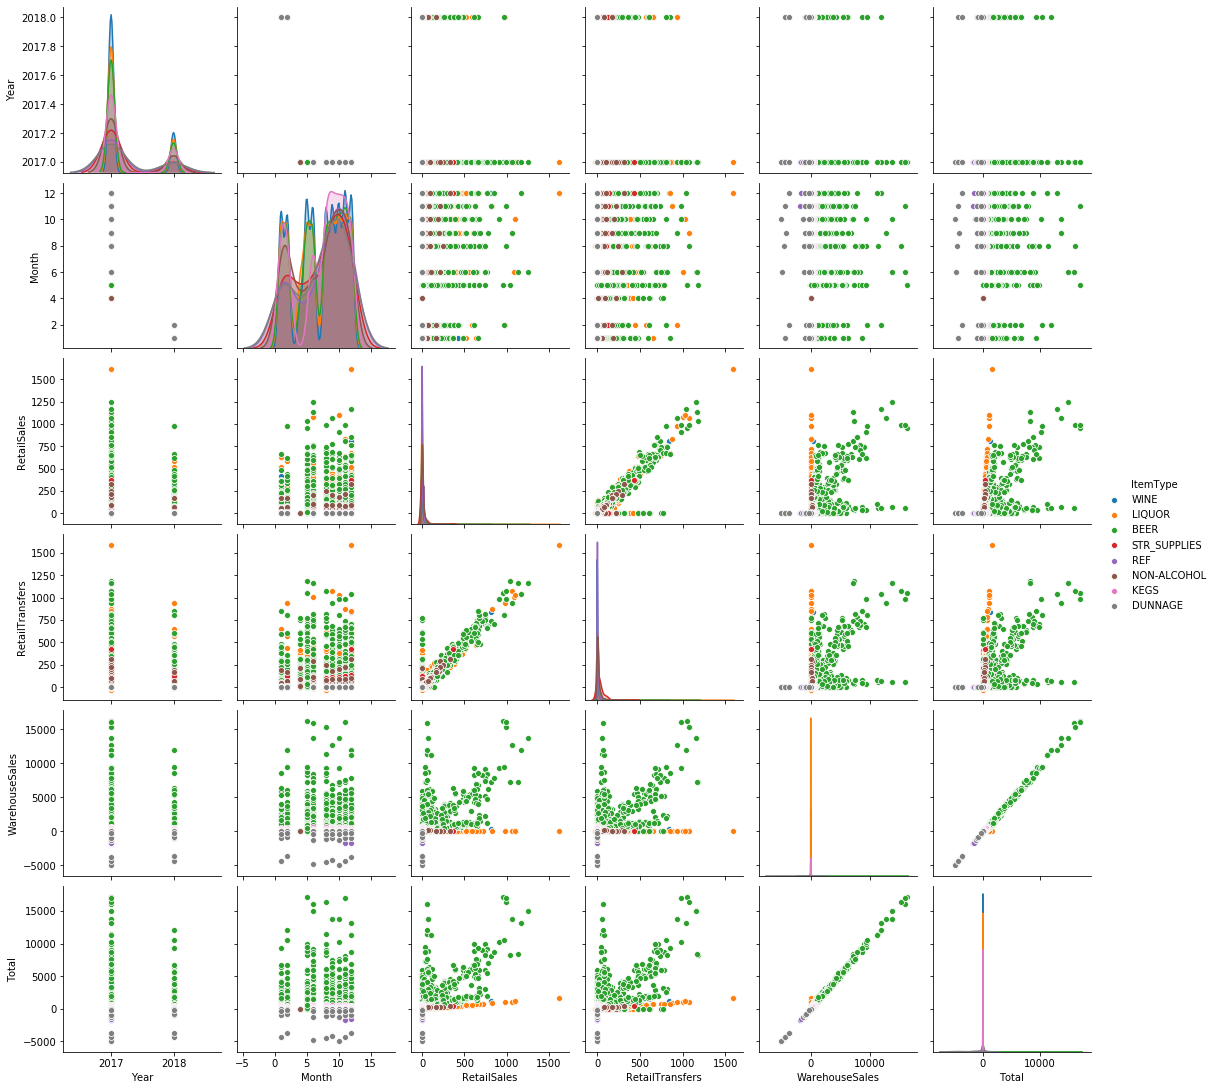

In [54]:
sns.pairplot(data, hue="ItemType")
